In [1]:
# Waiting for data from Prof

In [198]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os
import tensorflow as tf

/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [199]:
def sampleParse(excelname, save_loc):
    excel = os.path.join(save_loc, excelname)
    GFP = pd.read_excel(excel, sheet_name=0)
    UV = pd.read_excel(excel, sheet_name=1)
    UV = UV.rename(columns={x:y for x,y in zip(UV.columns,range(0,len(UV.columns)))})
    
    UV.loc[UV[0] == "Wavelength:"]
    Wavelength1 = UV.iloc[28:36]
    Wavelength1.columns = Wavelength1.iloc[0]
    Wavelength1 = Wavelength1.iloc[1:]
    sample1 = Wavelength1.iloc[3:6]
    sample1.drop(sample1.columns[len(sample1.columns)-1], axis=1, inplace=True)
    sample1.drop(sample1.columns[4], axis=1, inplace=True)
    sample1.drop(sample1.columns[0], axis=1, inplace=True)
    
    X = [int(x) for x in sample1.columns]
    for index, row in sample1.iterrows():
        Y = row.get_values()
        Y = [float(y) for y in Y]
        plt.plot(X, Y, label=index)
        print(index, linregress(X, Y))
    plt.savefig(os.path.join(save_loc, "lineplot.png"))

In [3]:
GFP = pd.read_excel("example_tecan_data.xlsx", sheet_name=0)
GFP

,SAFIRE II; Serial number: 607000009; Firmware: V 2.10 12/2007 Safire2; XFLUOR4SAFIREII Version: V 4.62n,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Date:,NaN,NaN,NaN,NaN,2017-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time:,NaN,NaN,NaN,NaN,11:59:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Measurement mode:,NaN,NaN,NaN,NaN,Fluorescence Bottom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Excitation wavelength:,NaN,NaN,NaN,NaN,483,nm,NaN,NaN,NaN,NaN,NaN,NaN
5,Emission wavelength:,NaN,NaN,NaN,NaN,525,nm,NaN,NaN,NaN,NaN,NaN,NaN
6,Excitation bandwidth:,NaN,NaN,NaN,NaN,20,nm,NaN,NaN,NaN,NaN,NaN,NaN
7,Emission bandwidth:,NaN,NaN,NaN,NaN,20,nm,NaN,NaN,NaN,NaN,NaN,NaN
8,Gain (Manual):,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Number of reads:,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
UV = pd.read_excel("example_tecan_data.xlsx", sheet_name=1)
UV = UV.rename(columns={x:y for x,y in zip(UV.columns,range(0,len(UV.columns)))})
UV

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Date:,NaN,NaN,NaN,NaN,2017-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time:,NaN,NaN,NaN,NaN,12:05:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Measurement mode:,NaN,NaN,NaN,NaN,Absorbance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wavelength scan type:,NaN,NaN,NaN,NaN,Absorbance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Wavelength start:,NaN,NaN,NaN,NaN,230,nm,NaN,NaN,NaN,NaN,NaN,NaN
6,Wavelength end:,NaN,NaN,NaN,NaN,280,nm,NaN,NaN,NaN,NaN,NaN,NaN
7,Scan number:,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Wavelength step size:,NaN,NaN,NaN,NaN,5,nm,NaN,NaN,NaN,NaN,NaN,NaN
9,Number of reads:,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
UV.loc[UV[0] == "Wavelength:"]

,0,1,2,3,4,5,6,7,8,9,10,11,12
28,Wavelength:,230,235,240,245,250,255,260,265,270,275,280,NaN
36,Wavelength:,230,235,240,245,250,255,260,265,270,275,280,NaN


In [37]:
Wavelength1 = UV.iloc[28:36]
Wavelength1

,0,1,2,3,4,5,6,7,8,9,10,11,12
28,Wavelength:,230,235,240,245,250,255,260,265,270,275,280,NaN
29,raw,OVER,OVER,OVER,--- Communication Error ! ---,OVER,3.5901,OVER,3.567,OVER,OVER,3.5482,1x
30,supe,OVER,OVER,OVER,--- Communication Error ! ---,OVER,3.5129,3.9393,3.5901,3.8386,3.6799,3.2097,NaN
31,boil,OVER,OVER,OVER,--- Communication Error ! ---,OVER,3.7423,OVER,3.7595,OVER,3.8447,3.5638,NaN
32,raw,2.0854,1.7348,1.5622,+,1.5317,1.5241,1.4897,1.4218,1.3439,1.2642,1.1822,dil 10x
33,supe,1.1526,0.9042,0.7999,-,0.7904,0.7837,0.7555,0.7039,0.6456,0.5917,0.5393,NaN
34,boil,1.1867,0.9342,0.8234,-,0.8031,0.7946,0.7678,0.7272,0.674,0.6201,0.5643,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Wavelength1.columns = Wavelength1.iloc[0]
Wavelength1 = Wavelength1.iloc[1:]
Wavelength1

28,Wavelength:,230,235,240,245,250,255,260,265,270,275,280,nan
29,raw,OVER,OVER,OVER,--- Communication Error ! ---,OVER,3.5901,OVER,3.567,OVER,OVER,3.5482,1x
30,supe,OVER,OVER,OVER,--- Communication Error ! ---,OVER,3.5129,3.9393,3.5901,3.8386,3.6799,3.2097,NaN
31,boil,OVER,OVER,OVER,--- Communication Error ! ---,OVER,3.7423,OVER,3.7595,OVER,3.8447,3.5638,NaN
32,raw,2.0854,1.7348,1.5622,+,1.5317,1.5241,1.4897,1.4218,1.3439,1.2642,1.1822,dil 10x
33,supe,1.1526,0.9042,0.7999,-,0.7904,0.7837,0.7555,0.7039,0.6456,0.5917,0.5393,NaN
34,boil,1.1867,0.9342,0.8234,-,0.8031,0.7946,0.7678,0.7272,0.674,0.6201,0.5643,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
sample1 = Wavelength1.iloc[3:6]

In [68]:
sample1.drop(sample1.columns[len(sample1.columns)-1], axis=1, inplace=True)

/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
print(sample1.columns)
sample1.drop(sample1.columns[4], axis=1, inplace=True)

Index(['Wavelength:', 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280], dtype='object', name=28)


/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
sample1.drop(sample1.columns[0], axis=1, inplace=True)

/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [113]:
sample1

28,230,235,240,250,255,260,265,270,275,280
32,2.0854,1.7348,1.5622,1.5317,1.5241,1.4897,1.4218,1.3439,1.2642,1.1822
33,1.1526,0.9042,0.7999,0.7904,0.7837,0.7555,0.7039,0.6456,0.5917,0.5393
34,1.1867,0.9342,0.8234,0.8031,0.7946,0.7678,0.7272,0.674,0.6201,0.5643


In [114]:
X = [int(x) for x in sample1.columns]
X

[230, 235, 240, 250, 255, 260, 265, 270, 275, 280]

32 LinregressResult(slope=-0.013787310606060607, intercept=5.043551515151515, rvalue=-0.9234346449636418, pvalue=0.00013697316050853637, stderr=0.002025737974691482)
33 LinregressResult(slope=-0.009355795454545457, intercept=3.161763636363637, rvalue=-0.9236760352187146, pvalue=0.00013529426268828784, stderr=0.0013721843990780434)
34 LinregressResult(slope=-0.009425340909090913, intercept=3.202427272727274, rvalue=-0.9198689919893052, pvalue=0.00016360466482715554, stderr=0.0014208956824471185)


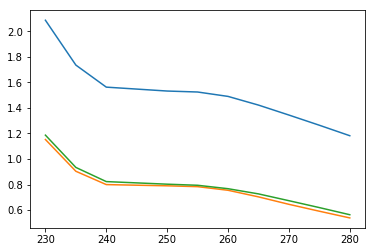

In [125]:
for index, row in sample1.iterrows():
    Y = row.get_values()
    Y = [float(y) for y in Y]
    plt.plot(X, Y, label=index)
    print(index, linregress(X, Y))



In [17]:
def sampleParse(excelname, save_loc):
    excel = os.path.join(save_loc, excelname)
    sheet = pd.read_excel(excel, sheet_name=0)
    index = sheet[sheet.columns[0]]
    return sheet

In [20]:
df = sampleParse("trial_1_data.xlsx", "./")
df

,SAFIRE II; Serial number: 607000009; Firmware: V 2.10 12/2007 Safire2; XFLUOR4SAFIREII Version: V 4.62n,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Date:,NaN,NaN,NaN,NaN,2017-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time:,NaN,NaN,NaN,NaN,11:59:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Measurement mode:,NaN,NaN,NaN,NaN,Fluorescence Bottom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Excitation wavelength:,NaN,NaN,NaN,NaN,496,nm,NaN,NaN,NaN,NaN,NaN,NaN
5,Emission wavelength:,NaN,NaN,NaN,NaN,520,nm,NaN,NaN,NaN,NaN,NaN,NaN
6,Excitation bandwidth:,NaN,NaN,NaN,NaN,5,nm,NaN,NaN,NaN,NaN,NaN,NaN
7,Emission bandwidth:,NaN,NaN,NaN,NaN,5,nm,NaN,NaN,NaN,NaN,NaN,NaN
8,Gain (Manual):,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Number of reads:,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.loc[df[df.columns[0]]=='<>'].index[0]

19

In [42]:
df2  = df.loc[df[df.columns[0]]=='Date:'].dropna(axis=1)

In [50]:
str(df2[df2.columns[1]][0])

'2017-08-04 00:00:00'

In [195]:
METADATA = ["Date:", "Time:", "Measurement mode:", "Excitation wavelength:", 
            "Emission wavelength:", "Excitation bandwidth:", "Emission bandwidth:",
           "Gain (Manual):", "Number of reads:", "FlashMode:", "Integration time:", "Lag time:",
           "Part of the plate:", "Target Temperature:", "Current Temperature:"]

class PipetteTutorial:
    def __init__(self, excelname, save_loc):
        excel = os.path.join(save_loc, excelname)
        self.df = pd.read_excel(excel, sheet_name=0)
        self.metadata = self.parseMetadata()
        self.data = self.parseData()
    def parseMetadata(self):
        df = self.df
        metadata = {}
        def parse(name):
            df2 = df.loc[df[df.columns[0]]==name].dropna(axis=1)
            return df2[df2.columns[1]].iloc[0]
        for item in METADATA:
            metadata[item] = parse(item)
        return metadata
    def parseData(self):
        data = {}
        df = self.df
        start_index = df.loc[df[df.columns[0]]=='<>'].index[0]
        df2 = df.iloc[start_index+1:]
        index = 'A'
        for row in df2.iterrows():
            df_row = list(row[1][1:])
            if "..." not in df_row:
                data[index] = df_row
                index = chr(ord(index) + 1)
        return pd.DataFrame(data)
    def dilutionLine(self, row, save_loc):
        Output = []
        plt.plot(self.data[row])
        Output.append(str(row) + ": " +  str(linregress(self.data['A'], self.data.index)))
        plt.savefig(os.path.join(save_loc, "lineplot.png"))
        plt.show()
        return Output


In [196]:
p1 = PipetteTutorial("trial_1_data.xlsx", "./")

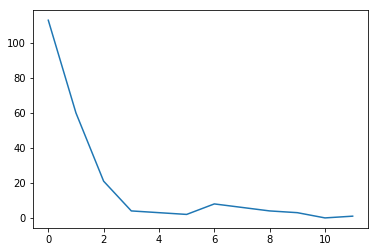

['A: LinregressResult(slope=-0.07386486221437677, intercept=6.884966166519565, rvalue=-0.6973665136565425, pvalue=0.01170214548885637, stderr=0.024006182758445092)']

In [197]:
p1.dilutionLine("A", ".")

In [183]:
p1.data

,A,B
0,113,0
1,60,1
2,21,0
3,4,1
4,3,0
5,2,1
6,8,1
7,6,1
8,4,1
9,3,1


In [179]:
p1.metadata

{'Date:': datetime.datetime(2017, 8, 4, 0, 0),
 'Time:': datetime.time(11, 59, 14),
 'Measurement mode:': 'Fluorescence Bottom',
 'Excitation wavelength:': 496,
 'Emission wavelength:': 520,
 'Excitation bandwidth:': 5,
 'Emission bandwidth:': 5,
 'Gain (Manual):': 29,
 'Number of reads:': 20,
 'FlashMode:': 'High sensitivity',
 'Integration time:': 40,
 'Lag time:': 0,
 'Part of the plate:': 'A1 - B12',
 'Target Temperature:': 37,
 'Current Temperature:': 32.3}

In [293]:
METADATA = ["Date:", "Time:", "Measurement mode:", "Excitation wavelength:", 
            "Emission wavelength:", "Excitation bandwidth:", "Emission bandwidth:",
           "Gain (Manual):", "Number of reads:", "FlashMode:", "Integration time:", "Lag time:",
           "Part of the plate:", "Target Temperature:", "Current Temperature:"]
FEATURES = list(range(6))
print(FEATURES)

[0, 1, 2, 3, 4, 5]


In [294]:
def monteCarloTrainingData(df, numSets=10, dataPts=128):
    df1 = df.T
    alldf1 = {}
    
    alldf1[0] = df1
    
    index = 1
    while index < numSets:
        cur_df1 = pd.DataFrame(columns=FEATURES)
        for f in FEATURES:
            stats = df1.describe()[f]
            print(stats)
            gen = np.random.normal(stats["mean"], stats["std"], dataPts)
            cur_df1[f] = gen
        
        alldf1[index] = cur_df1
        index+= 1
    
    return alldf1

In [295]:
conv_data = pd.DataFrame(p1.data["A"].iloc[0:6])
conv_data["B"] = list(p1.data["A"].iloc[6:12])
print(conv_data)
conv_data.T
conv_data.T.describe()[0]

     A  B
0  113  8
1   60  6
2   21  4
3    4  3
4    3  0
5    2  1


count      2.000000
mean      60.500000
std       74.246212
min        8.000000
25%       34.250000
50%       60.500000
75%       86.750000
max      113.000000
Name: 0, dtype: float64

In [296]:
dictA = monteCarloTrainingData(conv_data)

count      2.000000
mean      60.500000
std       74.246212
min        8.000000
25%       34.250000
50%       60.500000
75%       86.750000
max      113.000000
Name: 0, dtype: float64
count     2.000000
mean     33.000000
std      38.183766
min       6.000000
25%      19.500000
50%      33.000000
75%      46.500000
max      60.000000
Name: 1, dtype: float64
count     2.000000
mean     12.500000
std      12.020815
min       4.000000
25%       8.250000
50%      12.500000
75%      16.750000
max      21.000000
Name: 2, dtype: float64
count    2.000000
mean     3.500000
std      0.707107
min      3.000000
25%      3.250000
50%      3.500000
75%      3.750000
max      4.000000
Name: 3, dtype: float64
count    2.00000
mean     1.50000
std      2.12132
min      0.00000
25%      0.75000
50%      1.50000
75%      2.25000
max      3.00000
Name: 4, dtype: float64
count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2

In [335]:
dictA[2]['NN'] = 1
dictA[1]['NN'] = 0
dictA[2]

,0,1,2,3,4,5,NN
0,8.651450,11.863145,15.585244,3.710924,0.249983,2.598325,1
1,67.983929,86.065696,8.892474,3.965063,3.682143,1.464331,1
2,115.006345,114.757796,12.803243,3.732601,2.205245,0.891757,1
3,105.540492,53.414781,20.042467,3.090960,1.477984,0.488339,1
4,51.991841,-29.228947,-0.140033,3.968779,4.630067,2.416504,1
5,44.391458,-10.445308,29.890246,4.312610,2.436879,1.722414,1
6,-7.975945,55.177307,-5.967886,2.930712,0.443488,2.174510,1
7,44.593094,45.661908,-3.663674,3.067344,2.717505,1.197382,1
8,-7.549413,79.741557,12.153575,3.937713,3.212151,2.058769,1
9,46.766051,50.097236,28.525075,4.147956,1.775113,1.443368,1


In [336]:
dictA[1]

,0,1,2,3,4,5,NN
0,24.091734,-2.447378,6.230172,3.404535,-0.505269,1.750502,0
1,149.922992,33.733405,19.966351,3.618559,2.312330,1.264477,0
2,32.922079,49.514857,20.848066,3.035099,-0.523057,1.260808,0
3,30.670986,31.576573,8.723726,3.281488,0.806282,1.681317,0
4,120.801634,-16.516147,11.567808,3.928922,0.809204,-0.368867,0
5,79.460275,64.084932,10.321050,2.738110,-0.132204,1.442549,0
6,-8.382476,-16.416912,10.179619,3.653672,-2.703657,0.422296,0
7,141.116584,27.088181,4.585520,2.792723,1.201530,0.663391,0
8,-36.347490,30.718446,10.089949,2.760819,2.388620,1.762515,0
9,128.145957,63.500454,33.289453,3.626809,3.491139,2.069665,0


In [330]:
class Model:
    def __init__(self, model_dir):
        self.model = self.build_model(model_dir)
    
    #Build Model
    def build_model(self, model_dir):
        continuous_features = [tf.feature_column.numeric_column(str(k)) for k in FEATURES]
        model = tf.estimator.LinearClassifier(
            n_classes = 2,
            model_dir=model_dir, 
            feature_columns= continuous_features)
        return model
        #Build Model
    def build_model_regu(self, model_dir):
        continuous_features = [tf.feature_column.numeric_column(str(k)) for k in FEATURES]
        model = tf.estimator.LinearClassifier(
            n_classes = 2,
            model_dir=model_dir, 
            feature_columns= continuous_features,
            optimizer=tf.train.FtrlOptimizer(
            learning_rate=0.1,
            l1_regularization_strength=0.9,
            l2_regularization_strength=5))
        return model
    
    #Train Model
    def train_model(self, df_train):
        self.model.train(input_fn=get_input_fn(df_train, 
                                              num_epochs=None,
                                              n_batch = 16,
                                              shuffle=False),
                                              steps=128)

    #Evaluate Model
    def eval_model(self, df_test):
        self.model.evaluate(input_fn=get_input_fn(df_test, 
                                              num_epochs=None,
                                              n_batch = 16,
                                              shuffle=False),
                                              steps=128)
    #Make Prediction with Model
    def makePrediction(self, df):
        outputDF = df.copy()
        pred_iter = self.model.predict(tf.estimator.inputs.pandas_input_fn(df, shuffle=False))
        classifier = []
        for i in pred_iter:
            print(i)
            classifier.append(i['probabilities'])
        outputDF['classifier'] = classifier
        return outputDF
def get_input_fn(data_set, num_epochs=None, n_batch = 16, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({str(k): data_set[k].values for k in FEATURES}),
       y = pd.Series(data_set['NN'].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [331]:
m = Model("./")
m.train_model(dictA[1])
m.train_model(dictA[2])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a3391f400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INF

In [332]:
dictA[3].columns=["0", "1", "2", "3", "4", "5"]


In [333]:
m.makePrediction(dictA[3])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model.ckpt-1920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([7.25108], dtype=float32), 'logistic': array([0.99929106], dtype=float32), 'probabilities': array([7.0890487e-04, 9.9929106e-01], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}
{'logits': array([6.535273], dtype=float32), 'logistic': array([0.9985507], dtype=float32), 'probabilities': array([0.00144923, 0.9985507 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}
{'logits': array([3.075218], dtype=float32), 'logistic': array([0.9558589], dtype=float32), 'probabilities': array([0.04414115, 0.9558589 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}
{'logits': array([5.734416], dtype=float32), 'logistic': array([0.9967777],

{'logits': array([5.356334], dtype=float32), 'logistic': array([0.995304], dtype=float32), 'probabilities': array([0.00469601, 0.995304  ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}
{'logits': array([6.512508], dtype=float32), 'logistic': array([0.99851745], dtype=float32), 'probabilities': array([0.00148255, 0.99851745], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}
{'logits': array([10.311045], dtype=float32), 'logistic': array([0.99996674], dtype=float32), 'probabilities': array([3.3262564e-05, 9.9996674e-01], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}
{'logits': array([8.0091715], dtype=float32), 'logistic': array([0.99966776], dtype=float32), 'probabilities': array([3.3228955e-04, 9.9966776e-01], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}
{'logits': array([5.8248897], dtype=float32), 'logistic': array([0.99705553], dtype=float32), 'p

,0,1,2,3,4,5,classifier
0,-12.343735,126.041310,11.254591,3.362729,4.771122,1.546774,"[0.0007089049, 0.99929106]"
1,99.183988,-27.484807,19.108501,3.198175,1.178194,1.838310,"[0.0014492292, 0.9985507]"
2,47.728764,-24.283285,4.587305,2.742317,3.105715,1.507347,"[0.044141147, 0.9558589]"
3,137.208888,-48.867442,15.039348,2.817906,-0.237627,1.132175,"[0.0032223528, 0.9967777]"
4,59.849297,-37.047592,9.948390,2.686047,-0.212622,1.518164,"[0.04333759, 0.9566624]"
5,-40.475136,87.939645,17.377992,2.971270,2.524270,2.384292,"[0.0024338968, 0.9975661]"
6,77.366572,24.749440,6.659511,3.998795,-0.241889,1.551689,"[0.0059667677, 0.9940333]"
7,-80.279597,45.533446,37.802924,4.179048,2.090947,1.555850,"[0.00231161, 0.9976884]"
8,69.413568,38.950950,3.531866,4.281385,1.719994,2.326413,"[0.0032875375, 0.99671245]"
9,22.674878,73.286780,20.509605,4.622182,3.588095,1.528357,"[0.00036948393, 0.99963045]"


In [355]:
trial2 = PipetteTutorial("trial_2_data.xlsx", "./")

In [356]:
trial2.data

,A,B,C,D,E,F,G,H
0,3047.0,3238.0,3281.0,3290.0,2.0,1.0,2.0,0.0
1,2144.0,2153.0,2162.0,2215.0,0.0,1.0,1.0,2.0
2,1182.0,1243.0,1.0,0.0,2.0,1.0,2.0,3.0
3,558.0,1254.0,1228.0,0.0,0.0,0.0,1.0,2.0
4,340.0,514.0,625.0,598.0,0.0,0.0,1.0,1.0
5,171.0,324.0,340.0,306.0,178.0,169.0,185.0,1.0
6,2972.0,3268.0,3241.0,3061.0,2151.0,3133.0,3100.0,2928.0
7,1961.0,2064.0,2172.0,1975.0,1994.0,2024.0,1985.0,2113.0
8,1164.0,1166.0,1202.0,1143.0,1119.0,1103.0,1087.0,1058.0
9,381.0,448.0,468.0,483.0,520.0,468.0,520.0,496.0


In [342]:
Note = "Note: A1, column 7 - 12.5X diluted A2, column 8 - 20X diluted A3, column 9 - 50X diluted A4, column 10 - 125X diluted A5, column 11 - 250X diluted A6, column 12 - 500X diluted"

In [357]:
trial2.metadata

{'Date:': datetime.datetime(2017, 8, 4, 0, 0),
 'Time:': datetime.time(11, 59, 14),
 'Measurement mode:': 'Fluorescence Bottom',
 'Excitation wavelength:': 496,
 'Emission wavelength:': 520,
 'Excitation bandwidth:': 5,
 'Emission bandwidth:': 5,
 'Gain (Manual):': 70,
 'Number of reads:': 20,
 'FlashMode:': 'High sensitivity',
 'Integration time:': 40,
 'Lag time:': 0,
 'Part of the plate:': 'A1 - H12',
 'Target Temperature:': 37,
 'Current Temperature:': 32.3}